In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly
import matplotlib.pyplot as plt

/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_vaccine_statewise.csv
/kaggle/input/covid19-in-india/covid_19_india.csv


In [2]:
covid_india= pd.read_csv('../input/covid19-in-india/covid_19_india.csv', index_col=0)
covid_india.describe()

,Cured,Deaths,Confirmed
count,1.811000e+04,18110.000000,1.811000e+04
mean,2.786375e+05,4052.402264,3.010314e+05
std,6.148909e+05,10919.076411,6.561489e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.360250e+03,32.000000,4.376750e+03
50%,3.336400e+04,588.000000,3.977350e+04
75%,2.788698e+05,3643.750000,3.001498e+05
max,6.159676e+06,134201.000000,6.363442e+06


In [3]:
covid_india.isnull().sum()
covid_india.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)


We have no missing data so we do not have to fill in the missing values.

In [4]:
covid_india.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
Sno,,,,,,
1,2020-01-30,6:00 PM,Kerala,0,0,1
2,2020-01-31,6:00 PM,Kerala,0,0,1
3,2020-02-01,6:00 PM,Kerala,0,0,2
4,2020-02-02,6:00 PM,Kerala,0,0,3
5,2020-02-03,6:00 PM,Kerala,0,0,3


<AxesSubplot:xlabel='Confirmed'>

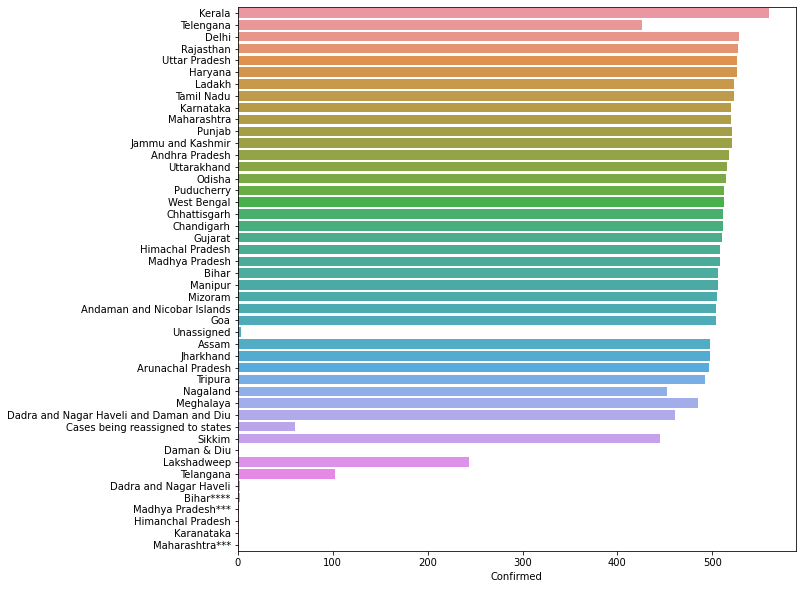

In [5]:
covid_india.head()
# Finding out the number of cases by states
stateWiseInfection= covid_india.groupby('State/UnionTerritory').Confirmed.count()
stateWiseInfection.sort_values(ascending=False)
columns = ['States/UnionTerritories','Infection']
df = pd.DataFrame(stateWiseInfection,covid_india['State/UnionTerritory'].unique())
plt.figure(figsize=(10,10))
sns.barplot(x=df['Confirmed'],y = covid_india['State/UnionTerritory'].unique())


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


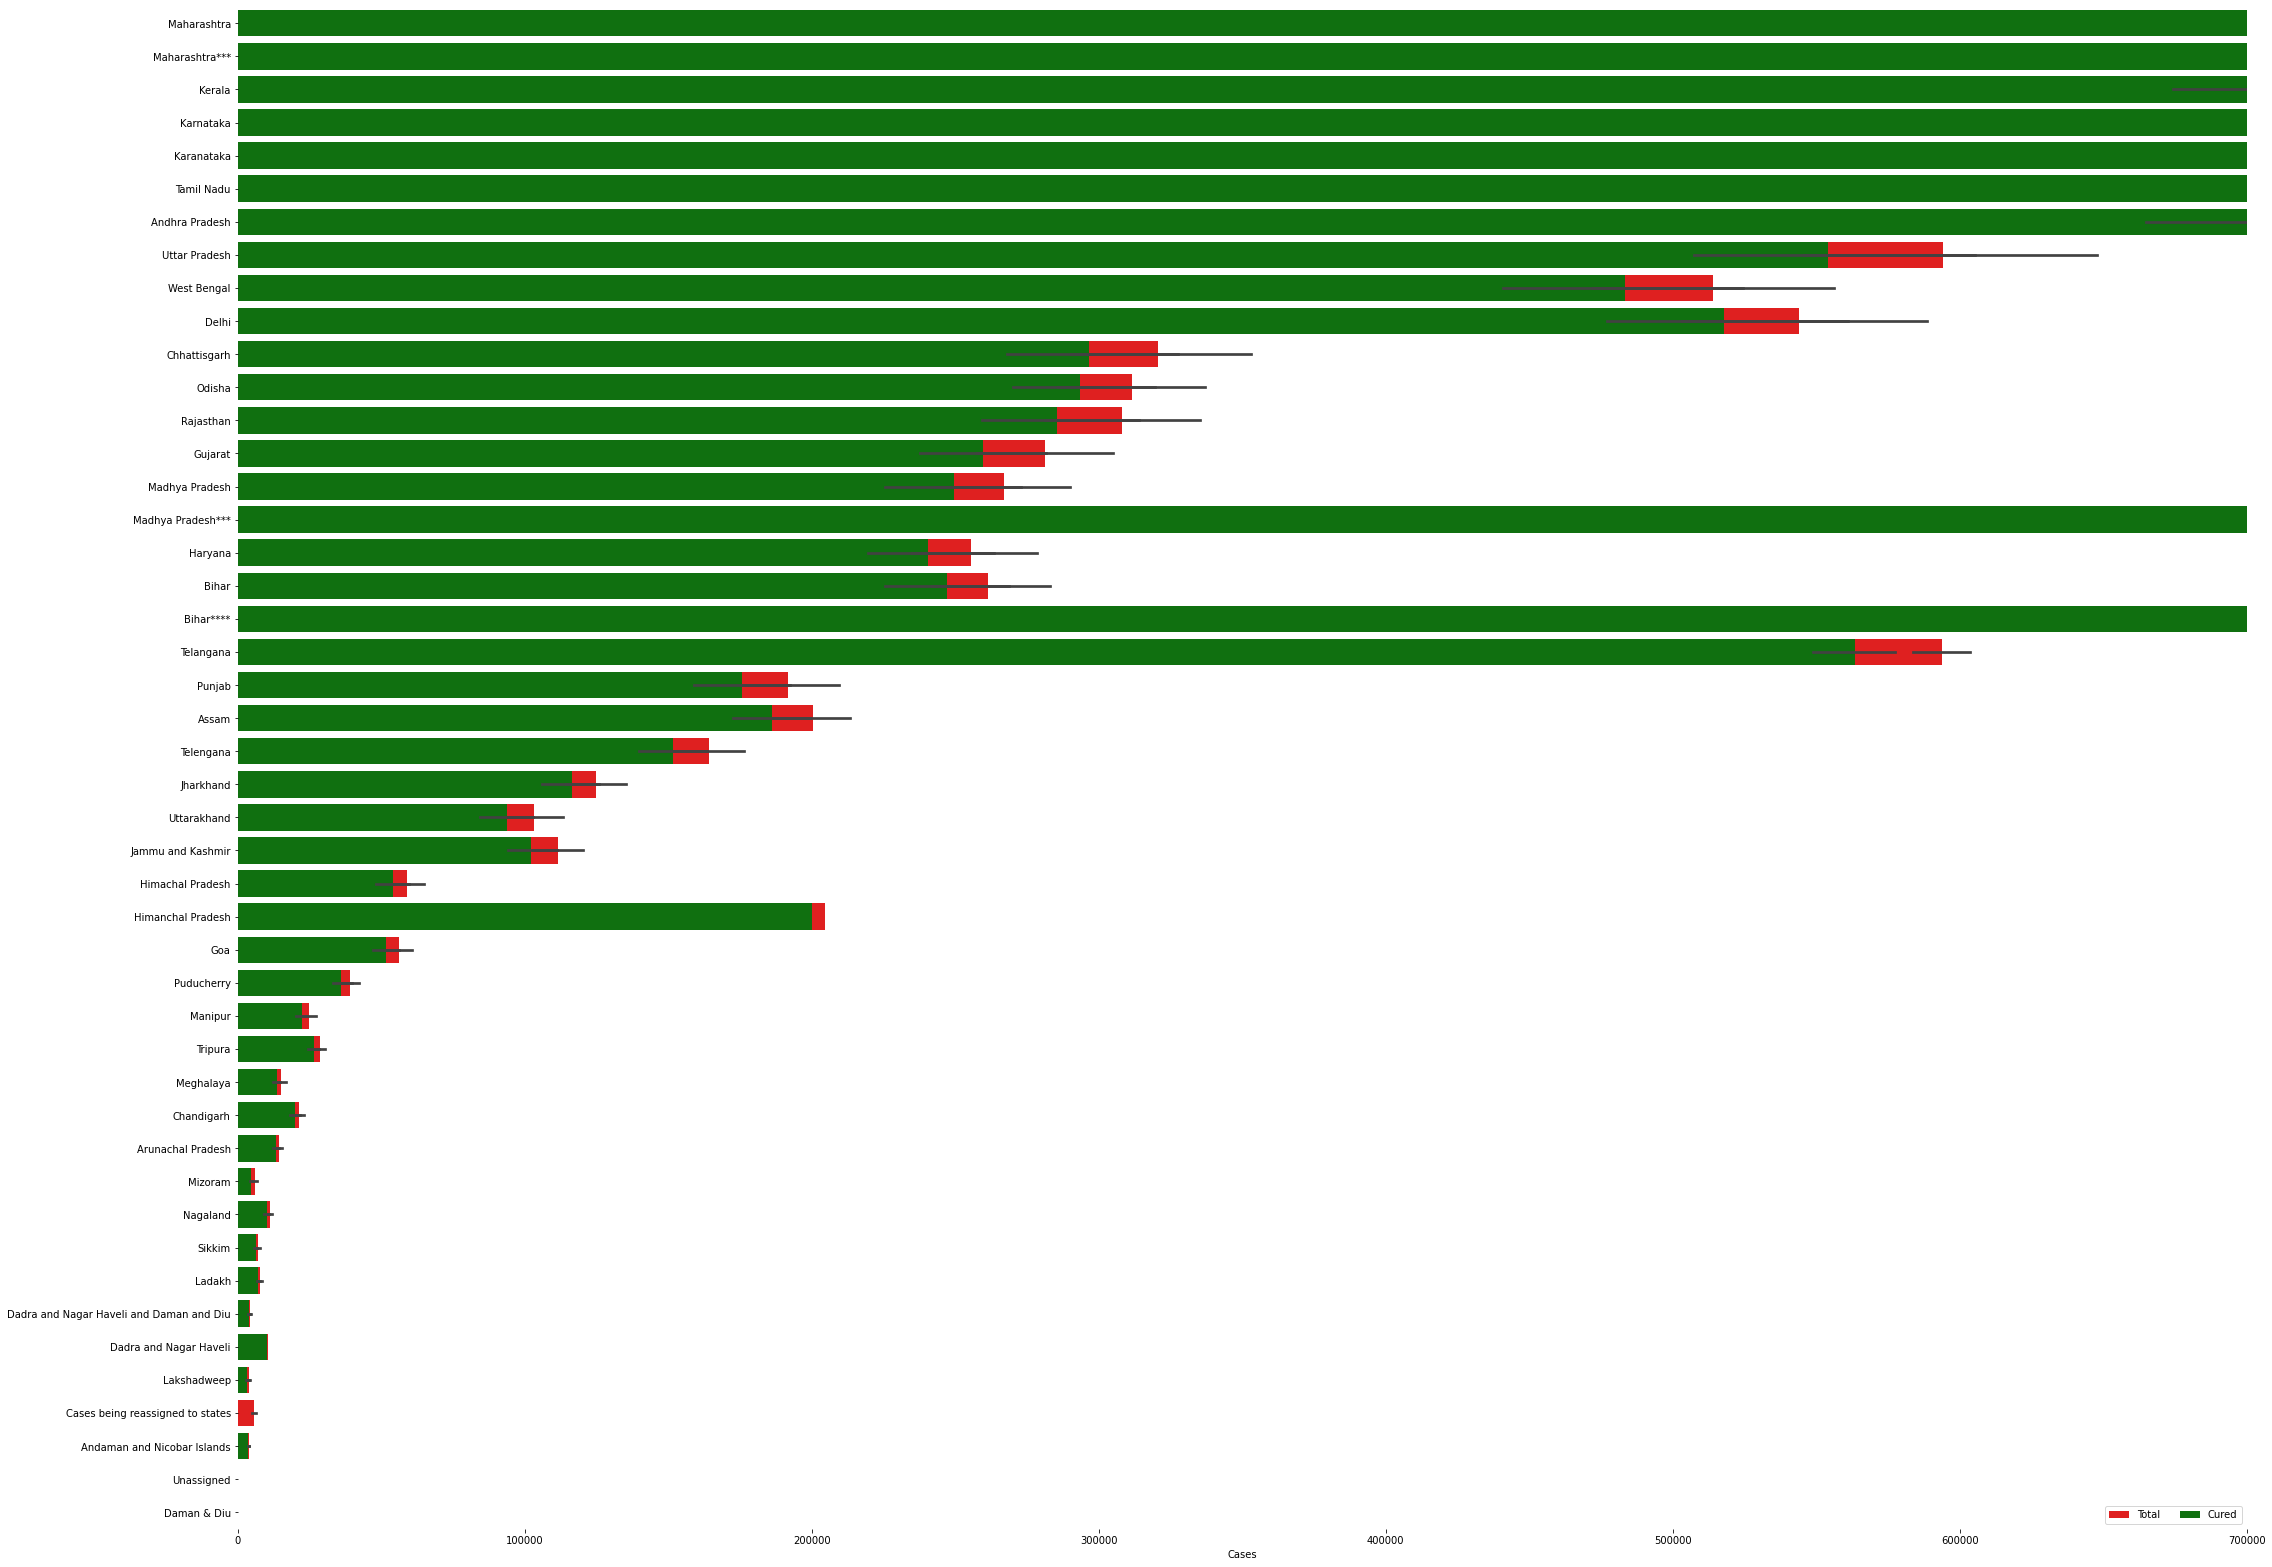

In [6]:
f, ax = plt.subplots(figsize=(36, 28))
data = covid_india[['State/UnionTerritory','Confirmed','Cured','Deaths']]   
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 700000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [7]:
covid_india['Date'] = pd.to_datetime(covid_india['Date'],dayfirst = True)
df = covid_india.copy()
df_confirmed_india=df.groupby('Date')['Confirmed'].sum().reset_index()
df_cured_india=df.groupby('Date')['Cured'].sum().reset_index()
df_death_india=df.groupby('Date')['Deaths'].sum().reset_index()

In [8]:
df_confirmed_india
df_cured_india
df_death_india

,Date,Deaths
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
555,2021-08-07,427371
556,2021-08-08,427862
557,2021-08-09,428309
558,2021-08-10,428682


In [9]:
print("The Confirmed Cases are",df_confirmed_india.Confirmed.max())
print("The Recovered Cases are",df_cured_india.Cured.max())
print("The Deaths Cases are",df_death_india.Deaths.max())

The Confirmed Cases are 32036511
The Recovered Cases are 31220981
The Deaths Cases are 429179


<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

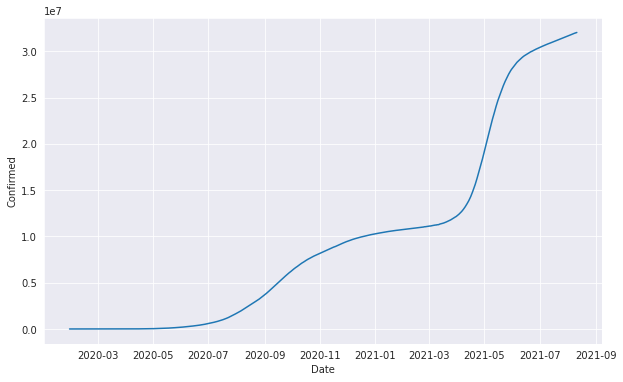

In [10]:
# Plotting the trend of Covid over the year
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.lineplot(data = df_confirmed_india, x = df_confirmed_india.Date, y = df_confirmed_india.Confirmed )


Text(0, 0.5, 'Confirmed Vs Cured')

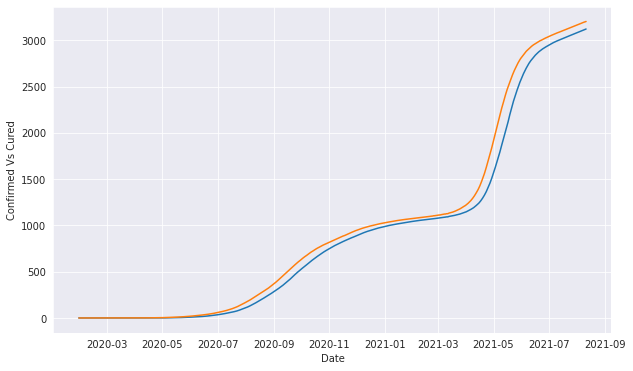

In [11]:
#Plotting the No. of cured cases over time
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.lineplot(data = df_cured_india, x = df_cured_india.Date, y = df_cured_india.Cured/10000 )
sns.lineplot(data = df_confirmed_india, x = df_confirmed_india.Date, y = df_confirmed_india.Confirmed/10000 )
plt.ylabel('Confirmed Vs Cured')



<AxesSubplot:xlabel='Date', ylabel='Deaths'>

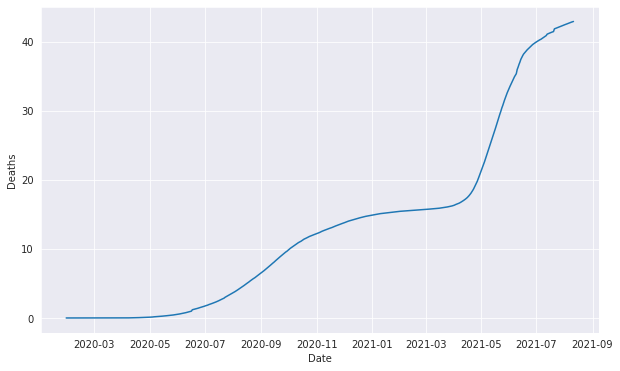

In [12]:
# To plot the number of deaths
plt.figure(figsize=(10,6))
sns.lineplot(data = df_death_india, x = df_death_india.Date, y = df_death_india.Deaths/10000 )

The maximum number of cases recorded in a day was 414188


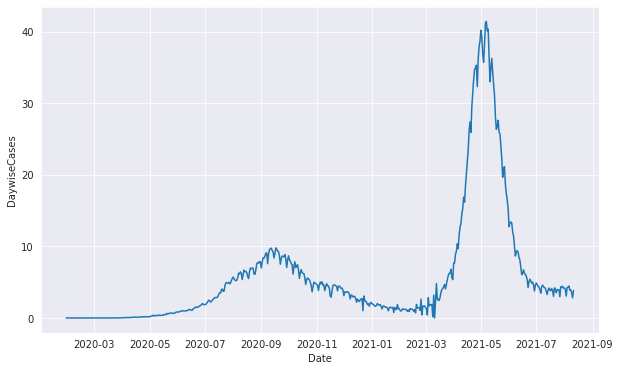

In [13]:
# Day wise distribution of the number of confirmed cases
# sns.kdeplot(a=df_confirmed_india['Confirmed'], label='Confirmed Cases')
plt.figure(figsize=(10,6))
df_confirmed_india['DaywiseCases'] = 0
df_confirmed_india.loc[0,'DaywiseCases'] = df_confirmed_india.loc[0,'Confirmed']
for i in range(1,len(df_confirmed_india.Date)):
    df_confirmed_india.loc[i,'DaywiseCases'] = df_confirmed_india.loc[i,'Confirmed'] - df_confirmed_india.loc[i-1,'Confirmed']
df_confirmed_india
# sns.kdeplot(a=df_confirmed_india['DaywiseCases'], label='Day Wise Cases')
sns.lineplot(data = df_confirmed_india, x = df_confirmed_india.Date, y = df_confirmed_india.DaywiseCases/10000 , )
print(f'The maximum number of cases recorded in a day was {df_confirmed_india.DaywiseCases.max()}')

# > **Lets Analyse thecases statewise and try to derive some metrics out of it**

In [14]:
state_wise_cases = df.groupby('State/UnionTerritory')['Confirmed','Cured','Deaths'].max().reset_index()
state_wise_cases

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,State/UnionTerritory,Confirmed,Cured,Deaths
0,Andaman and Nicobar Islands,7548,7412,129
1,Andhra Pradesh,1985182,1952736,13564
2,Arunachal Pradesh,50605,47821,248
3,Assam,576149,559684,5420
4,Bihar,725279,715352,9646
5,Bihar****,715730,701234,9452
6,Cases being reassigned to states,9265,0,0
7,Chandigarh,61992,61150,811
8,Chhattisgarh,1003356,988189,13544
9,Dadra and Nagar Haveli,10377,10261,4


***We can see that some of the elements are repeating(Eg: Bihar, Maharashtra, Madhya Pradesh occurs 2 times,) and some entries which does does not make sense at all(Eg: Cases being reassigned to states). For these entries it makes sense to remove the duplicate entries and the entries which might skew the data. ***

In [15]:
state_wise_cases = state_wise_cases.drop(labels=[5,6,26,28], axis=0)
state_wise_cases

,State/UnionTerritory,Confirmed,Cured,Deaths
0,Andaman and Nicobar Islands,7548,7412,129
1,Andhra Pradesh,1985182,1952736,13564
2,Arunachal Pradesh,50605,47821,248
3,Assam,576149,559684,5420
4,Bihar,725279,715352,9646
7,Chandigarh,61992,61150,811
8,Chhattisgarh,1003356,988189,13544
9,Dadra and Nagar Haveli,10377,10261,4
10,Dadra and Nagar Haveli and Daman and Diu,10654,10646,4
11,Daman & Diu,2,0,0


***We can also see that there are some spelling mistakes in the data which are causing the values to be unique(Eg: Karnataka and Karanataka). On further investigation, it seems like the data is repetitive and one of them should be removed. ***

In [16]:
state_wise_cases = state_wise_cases.drop(labels=[20,17,40,11], axis=0)
state_wise_cases

,State/UnionTerritory,Confirmed,Cured,Deaths
0,Andaman and Nicobar Islands,7548,7412,129
1,Andhra Pradesh,1985182,1952736,13564
2,Arunachal Pradesh,50605,47821,248
3,Assam,576149,559684,5420
4,Bihar,725279,715352,9646
7,Chandigarh,61992,61150,811
8,Chhattisgarh,1003356,988189,13544
9,Dadra and Nagar Haveli,10377,10261,4
10,Dadra and Nagar Haveli and Daman and Diu,10654,10646,4
12,Delhi,1436852,1411280,25068


In [17]:
state_wise_cases['Active'] = state_wise_cases['Confirmed'] - state_wise_cases['Cured'] - state_wise_cases['Deaths']
state_wise_cases['Death Rate (per 100)'] = np.round((state_wise_cases['Deaths']/state_wise_cases['Confirmed']) *100, 2)
state_wise_cases['Cure Rate (per 100)'] =  np.round((state_wise_cases['Cured']/state_wise_cases['Confirmed']) *100, 2)

state_wise_cases.reset_index(drop = True, inplace=True)
state_wise_cases

,State/UnionTerritory,Confirmed,Cured,Deaths,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,7548,7412,129,7,1.71,98.20
1,Andhra Pradesh,1985182,1952736,13564,18882,0.68,98.37
2,Arunachal Pradesh,50605,47821,248,2536,0.49,94.50
3,Assam,576149,559684,5420,11045,0.94,97.14
4,Bihar,725279,715352,9646,281,1.33,98.63
5,Chandigarh,61992,61150,811,31,1.31,98.64
6,Chhattisgarh,1003356,988189,13544,1623,1.35,98.49
7,Dadra and Nagar Haveli,10377,10261,4,112,0.04,98.88
8,Dadra and Nagar Haveli and Daman and Diu,10654,10646,4,4,0.04,99.92
9,Delhi,1436852,1411280,25068,504,1.74,98.22


In [18]:
state_wise_cases['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Unassigned',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)